In [89]:
import pandas as pd
import numpy as np

### Read the initial Epicurious dataset with recipes

In [6]:
import json
from pprint import pprint

In [7]:
with open('epicurious/full_format_recipes.json') as f:
    recipes = json.load(f)

In [8]:
recipes=[x for x in recipes if len(x)>0]

In [9]:
len(recipes)

20111

In [182]:
recipes[0]

{'calories': 426.0,
 'categories': ['sandwich',
  'bean',
  'fruit',
  'tomato',
  'turkey',
  'vegetable',
  'kid-friendly',
  'apple',
  'lentil',
  'lettuce',
  'cookie'],
 'date': '2006-09-01T04:00:00.000Z',
 'desc': None,
 'directions': ['1. Place the stock, lentils, celery, carrot, thyme, and salt in a medium saucepan and bring to a boil. Reduce heat to low and simmer until the lentils are tender, about 30 minutes, depending on the lentils. (If they begin to dry out, add water as needed.) Remove and discard the thyme. Drain and transfer the mixture to a bowl; let cool.',
  '2. Fold in the tomato, apple, lemon juice, and olive oil. Season with the pepper.',
  '3. To assemble a wrap, place 1 lavash sheet on a clean work surface. Spread some of the lentil mixture on the end nearest you, leaving a 1-inch border. Top with several slices of turkey, then some of the lettuce. Roll up the lavash, slice crosswise, and serve. If using tortillas, spread the lentils in the center, top with th

### Upload the ingredients from "What's cooking dataset" to extract ingredients from recipes


In [71]:
with open('cooking.json') as f:
    cooking = json.load(f)

In [68]:
#Stem ingredient names from "what's cooking dataset"

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize("apples"))

apple


In [72]:
#@ Obtain the clean list of ingredients
ing=[]

for x in cooking:
    ing.extend(x['ingredients'])
    
ing=set(ing)

cooking=[]
for x in ing:
    cooking.append(lemmatizer.lemmatize(x))

In [73]:
cooking=[x.lower() for x in cooking]

In [74]:
cooking=list(set(cooking))

In [75]:
len(cooking)

6703

### Extract ingredients from recipes and record them as "ingredients_short" in json file

In [76]:
no_ingredient=[]

In [77]:
def extract(x):
    a=[]
    for ing in cooking:
        if ing in x.lower():
            a.append(ing)
    if len(a)>1:
        a=max(a, key=len)    
    elif len(a)==1:
        a=a[0]
    elif len(a)==0:
        a='no ingredient'
        no_ingredient.append(x)
    return a

In [78]:
for i in range(len(recipes)):
    try:
        b=recipes[i]['ingredients']
        n=[]
        for bb in b:
            n.append(extract(bb))
        recipes[i]['ingredients_short']=n
    except:
        continue

In [79]:
cooking.extend(['mayonnaise', 'parmesan', 'feta', 'cashews','cheddar', 'berries','Grand Marnier','cranberries','grated parmesan', 
                'gruyère', 'strawberries', 'bourbon', 'blueberries', 'pecorino', 'crème fraîche', 'raspberries', 
                'fettuccine', 'marsala','macaroon', 'tabasco', 'cherries', 'mozzarella', 'romaine', 'crème de menthe', 
                'crème de cacao', 'créme fraîche', 'crème de cassis', 'curaçao'])

In [82]:
cooking=list(set(cooking))

In [83]:
len(cooking)

6731

In [84]:
for i  in range(len(recipes)):
    recipes[i]['categories']=[x.lower() for x in recipes[i]['categories']]

In [ ]:
with open('recipes.json', 'w') as outfile:
    json.dump(recipes, outfile)

### Non-key ingredients (spices)

In [12]:
spices=pd.read_csv("spices.csv")

In [14]:
spices=list(spices['spices'])

In [26]:
spices=[x.lower() for x in spices]

In [36]:
spices.remove('avocado')

In [ ]:
spices=list(set(spices))

In [125]:
spices=[x for x in spices if x in data_short.columns]

In [185]:
pd.DataFrame(spices, columns=['spices']).to_csv('spices.csv', encoding="UTF-8")

### Create the data new dataset with all ingredients and nutrition information (data.csv)

In [85]:
# Extract ingredients present in the Epicurious dataset
new_ingredients=[]
for x in recipes:
    try:
        new_ingredients.extend(x['ingredients_short'])
    except:
        continue

In [86]:
new_ingredients=list(set(new_ingredients))

len(new_ingredients)

3678

In [ ]:
data[x]=pd.Series([1 if x in recipes[i]["ingredients_short"] else 0 for i in range(len(recipes))] )

In [740]:
data=pd.DataFrame([[1 if new_ingredients[j] in recipes[i]["ingredients_short"] else 0 for j in range(len(new_ingredients))] 
                   for i in range(len(recipes))])

In [741]:
data.columns=new_ingredients

In [742]:
data['title']=pd.Series([x['title'] for x in recipes])

In [743]:
t=['title']
t.extend(data.columns[:-1])
data=data[t]

In [744]:
data.head()

,title,cremini mushrooms,caramel,orecchiette,maldon sea salt,baby bok choy,sliced mushrooms,pimenton,radish,mortadella,...,strip loin,bouquet garni,green chard,guajillo,crumb topping,toast points,coffee,asian noodles,oatmeal,refried beans
0,"Lentil, Apple, and Turkey Wrap",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Boudin Blanc Terrine with Red Onion Confit,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Potato and Fennel Soup Hodge,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Mahi-Mahi in Tomato Olive Sauce,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Spinach Noodle Casserole,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [745]:
# nutritional value
data['calories']=pd.Series([x['calories'] for x in recipes])
data['protein']=pd.Series([x['protein'] for x in recipes])
data['fat']=pd.Series([x['fat'] for x in recipes])
data['carbs']=(data['calories']-data['fat']*9-data['protein']*4)/4
data['sodium']=pd.Series([x['sodium'] for x in recipes])

In [746]:
# of steps to create the dish (for complexity measure)
data['steps']=pd.Series([len(x['directions']) for x in recipes])

In [747]:
# meal type
data['breakfast']=pd.Series([int('breakfast' in x['categories']) for x in recipes])
data['lunch']=pd.Series([int('lunch' in x['categories']) for x in recipes])
data['dinner']=pd.Series([int('dinner' in x['categories']) for x in recipes])
data['snack']=pd.Series([int('snack' in x['categories']) for x in recipes])
data['drink']=pd.Series([int(('drink' in x['categories'])|('drinks' in x['categories'])) for x in recipes])


In [748]:
data.head()

,title,cremini mushrooms,caramel,orecchiette,maldon sea salt,baby bok choy,sliced mushrooms,pimenton,radish,mortadella,...,calories,protein,carbs,sodium,steps,breakfast,lunch,dinner,snack,drink
0,"Lentil, Apple, and Turkey Wrap",0,0,0,0,0,0,0,0,0,...,426.0,30.0,60.75,559.0,3,0,0,0,0,0
1,Boudin Blanc Terrine with Red Onion Confit,0,0,0,0,0,0,0,0,0,...,403.0,18.0,31.00,1439.0,5,0,0,0,0,0
2,Potato and Fennel Soup Hodge,0,0,0,0,0,0,0,0,0,...,165.0,6.0,19.50,165.0,2,0,0,0,0,0
3,Mahi-Mahi in Tomato Olive Sauce,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,2,0,0,1,0,0
4,Spinach Noodle Casserole,0,0,0,0,0,0,0,0,0,...,547.0,20.0,44.75,452.0,1,0,0,0,0,0


In [749]:
def get_meal(x):
    if sum(x[['breakfast', 'lunch', 'dinner', 'snack', 'drink']])==0:
        return 0
    else:
        return x[['breakfast', 'lunch', 'dinner', 'snack', 'drink']].argmax()

data['meal']=pd.Series([get_meal(data.loc[i]) for i in data.index])

### Training to define meal types of all recipes

In [750]:
train=data[data.meal!=0]

In [751]:
train.drop(['breakfast', 'lunch', 'dinner', 'snack', 'drink', 
            'calories','protein','carbs','fat','sodium','steps'], axis=1, inplace=True)

C:\Users\vnuretdi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [752]:
train.head()

,title,cremini mushrooms,caramel,orecchiette,maldon sea salt,baby bok choy,sliced mushrooms,pimenton,radish,mortadella,...,strip loin,bouquet garni,green chard,guajillo,crumb topping,toast points,coffee,asian noodles,oatmeal,refried beans
3,Mahi-Mahi in Tomato Olive Sauce,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Ham Persillade with Mustard Potato Salad and M...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,Spicy Noodle Soup,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,Sweet Buttermilk Spoon Breads,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,"Tuna, Asparagus, and New Potato Salad with Chi...",0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Embedding through PCA. First illustration with 2 PCA dimensions

In [753]:
from sklearn.decomposition import PCA

In [754]:
ndim=2

pca = PCA(ndim)
train_pca1 = pca.fit_transform(train.drop(['title', 'meal'], axis=1))            

In [755]:
train_pca1=pd.DataFrame(train_pca1, index=train.index)

In [194]:
train_pca1['meal']=train['meal']

In [195]:
train_pca1.head()

,0,1,meal
3,-0.136992,-0.390212,dinner
9,-0.016210,-0.247051,lunch
11,-0.012962,0.243809,breakfast
16,-0.710431,0.320135,breakfast
19,0.460719,-0.288408,lunch


In [205]:
color={"dinner":'green', 'breakfast': 'orange', 'lunch':'red','drink':'blue', 'snack':'violet'}

In [259]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

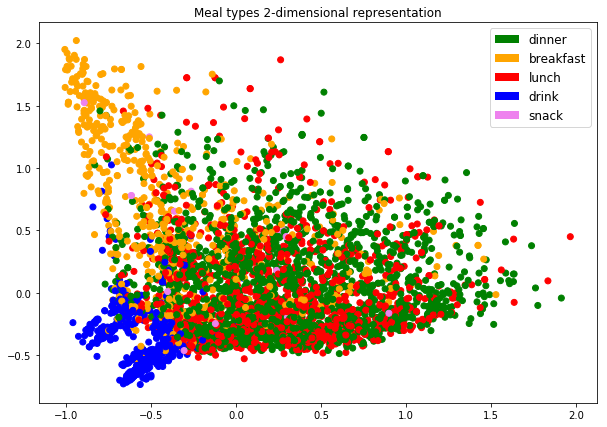

In [261]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(10,7))
plt.scatter(train_pca1[0], train_pca1[1], c=[color[x] for x in train_pca1['meal']])
plt.title("Meal types 2-dimensional representation")
    
recs = []
for key in color.keys():
    recs.append(mpatches.Rectangle((1,1),0,0, fc=color[key]))
plt.legend(recs, [z for z in color.keys()], bbox_to_anchor=(1, 1), fontsize=12)


plt.show()



In [ ]:
# There's no clear difference between lunch and dinners
data.replace(['lunch','dinner'], 'lunch/dinner', inplace=True)

### PCA with 100 dimension for all data

In [756]:
train=data.copy()
train.drop(['breakfast', 'lunch', 'dinner', 'snack', 'drink', 
            'calories','protein','carbs','fat','sodium','steps'], axis=1, inplace=True)

In [757]:
ndim=100

pca = PCA(ndim)
data_pca = pca.fit_transform(train.drop(['title', 'meal'], axis=1))            

In [758]:
data_pca=pd.DataFrame(data_pca, index=train.index)

In [759]:
data_pca['title']=train['title']
data_pca['meal']=train['meal']

In [760]:
data_pca.replace(['lunch','dinner'], 'lunch/dinner', inplace=True)

In [761]:
# Split into test, dev and train

train_pca=data_pca[data.meal!=0]
test_pca=data_pca[data.meal==0]

In [762]:
test_pca.shape

(14910, 102)

In [763]:
train_pca.shape

(5201, 102)

In [764]:
from sklearn.model_selection import train_test_split

train_pca, dev_pca = train_test_split(train_pca, test_size=0.2, stratify=train_pca['meal'])

In [765]:
train_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,title,meal
636,-0.801960,0.224087,-0.741671,0.232380,-0.014969,0.473573,0.911328,-0.191951,-0.417388,0.705745,...,-0.304547,0.341657,0.177504,0.257952,-0.059317,-0.211383,0.280964,-0.088817,"'Wichcraft's Roasted Turkey, Avocado, Bacon, O...",lunch/dinner
10801,0.374184,-0.612761,0.688507,0.523595,0.245824,0.169521,-0.191755,-0.276050,-0.028534,0.400795,...,-0.062619,-0.021151,-0.078339,0.003348,-0.037097,-0.029260,-0.068678,0.008982,Peach Raspberry Smoothie,drink
4351,-0.595800,0.003345,-0.362232,0.508364,-0.200195,-0.214290,0.064500,-0.274907,-0.197543,-0.078021,...,-0.037883,0.121999,0.048984,-0.093908,0.095222,0.052936,0.090539,-0.060841,"Smoked Turkey, Blue Cheese, and Red Onion Sand...",lunch/dinner
12705,-0.798144,0.196458,-0.714702,0.273164,0.032104,0.420719,0.829192,-0.191511,-0.418330,0.677552,...,-0.140360,0.063403,0.021090,-0.106814,0.045655,-0.031652,-0.007623,-0.031430,Roasted Tomato and Arugula Salad,lunch/dinner
10966,-0.711552,0.249578,-0.588882,0.183648,0.240197,0.258520,0.680016,-0.139428,-0.022044,0.568356,...,-0.084001,-0.038072,-0.042537,0.008681,0.090554,0.012657,0.067027,0.011405,Michael Romano's Secret-Ingredient Soup,lunch/dinner


In [766]:
train_pca.shape

(4160, 102)

In [767]:
dev_pca.shape

(1041, 102)

### 1-hidden layer neural net to identify the meal type

In [768]:
# create train vectors
y_train, indices = np.unique(train_pca['meal'], return_inverse=True)
x_train=np.asarray(train_pca.drop(['title','meal'],axis=1))
indices=np.asarray(indices)

In [769]:
test_indices =[list(y_train).index(dev_pca.loc[i]['meal']) for i  in dev_pca.index]
test_indices=np.asarray(test_indices)

x_test=np.asarray(dev_pca.drop(['title','meal'],axis=1))

In [770]:
import tensorflow as tf

In [771]:
# Hyperparameters
V = 4
n_hidden = 25
n_input=100

# Inputs
# Using "None" in place of batch size allows 
# it to be dynamically computed later.

with tf.name_scope("Inputs"):    
    x_ = tf.placeholder("float", [None, n_input])
    y_ = tf.placeholder(tf.int32, [None])
    
with tf.name_scope("Hidden_Layer"):
    W1_=tf.Variable(tf.random_normal([n_input, n_hidden]))
    b1_=tf.Variable(tf.random_normal([n_hidden,]))
    h_ = tf.tanh(tf.matmul(x_, W1_) + b1_, name="h")
    
with tf.name_scope("Output_Layer"):
    W2_ = tf.Variable(tf.random_normal([n_hidden,V]), name="W2")
    b2_ = tf.Variable(tf.zeros([V,], dtype=tf.float32), name="b2")
    logits_ = tf.add(tf.matmul(h_, W2_), b2_, name="logits")

In [772]:
with tf.name_scope("Cost_Function"):
    # Sampled softmax loss, for training
    per_example_train_loss_ = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y_, logits=logits_)    
    
    train_loss_ = tf.reduce_mean(per_example_train_loss_, name="sampled_softmax_loss")
    
    # Full softmax loss, for scoring
    per_example_loss_ = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y_, logits=logits_, name="per_example_loss")
    loss_ = tf.reduce_mean(per_example_loss_, name="loss")

with tf.name_scope("Training"):
    alpha_ = tf.placeholder(tf.float32, name="learning_rate")
    optimizer_ = tf.train.AdamOptimizer(alpha_)
    # train_step_ = optimizer_.minimize(loss_)
    train_step_ = optimizer_.minimize(train_loss_)
    
# Initializer step
init_ = tf.global_variables_initializer()

with tf.name_scope("Prediction"):
    pred_proba_ = tf.nn.softmax(logits_, name="pred_proba")
    pred_max_ = tf.argmax(logits_, 1, name="pred_max")
    pred_random_ = tf.multinomial(logits_, 1, name="pred_random")

with tf.name_scope("Training"):
    alpha_ = tf.placeholder(tf.float32, name="learning_rate")
    optimizer_ = tf.train.AdagradOptimizer(alpha_)
    # train_step_ = optimizer_.minimize(loss_)
    train_step_ = optimizer_.minimize(train_loss_)
    
# Initializer step
init_ = tf.global_variables_initializer()

with tf.name_scope("Prediction"):
    pred_proba_ = tf.nn.softmax(logits_, name="pred_proba")
    pred_max_ = tf.argmax(logits_, 1, name="pred_max")
    pred_random_ = tf.multinomial(logits_, 1, name="pred_random")

In [773]:
def train_batch(session, batch_x, batch_y, alpha):
            
    feed_dict = {x_:batch_x,
                 y_:batch_y,
                 alpha_:alpha}
    
    c, _ = session.run([train_loss_, train_step_],
                       feed_dict=feed_dict)
    return c

num_epochs = 60
batch_size = 100
alpha = 0.1  # learning rate
print_every = 100

In [774]:
total_batch = int(train_pca.shape[0] / batch_size)        
x_batches = np.array_split(x_train, total_batch)
y_batches = np.array_split(indices, total_batch)

np.random.seed(42)

session = tf.Session()
session.run(init_)

for epoch in range(1, num_epochs+1):
    epoch_cost = 0.0
    total_batches = 0
    print ("")
    for i in range(total_batch):
        batch_x, batch_y = x_batches[i], y_batches[i]
        #print(batch_x.shape, batch_y.shape)
        
        epoch_cost += train_batch(session, batch_x, batch_y, alpha)
        total_batches = i + 1

    avg_cost = epoch_cost / total_batches
    print ("[epoch %d] Average cost: %.03f" % (epoch, avg_cost,))

def predict(session, x):
    feed_dict={x_:x}
    meal, proba = session.run([pred_max_, pred_proba_], feed_dict=feed_dict)
    return meal, proba




[epoch 1] Average cost: 2.003

[epoch 2] Average cost: 0.837

[epoch 3] Average cost: 0.624

[epoch 4] Average cost: 0.527

[epoch 5] Average cost: 0.469

[epoch 6] Average cost: 0.429

[epoch 7] Average cost: 0.400

[epoch 8] Average cost: 0.378

[epoch 9] Average cost: 0.360

[epoch 10] Average cost: 0.347

[epoch 11] Average cost: 0.335

[epoch 12] Average cost: 0.325

[epoch 13] Average cost: 0.317

[epoch 14] Average cost: 0.310

[epoch 15] Average cost: 0.303

[epoch 16] Average cost: 0.298

[epoch 17] Average cost: 0.292

[epoch 18] Average cost: 0.288

[epoch 19] Average cost: 0.283

[epoch 20] Average cost: 0.280

[epoch 21] Average cost: 0.276

[epoch 22] Average cost: 0.272

[epoch 23] Average cost: 0.269

[epoch 24] Average cost: 0.266

[epoch 25] Average cost: 0.263

[epoch 26] Average cost: 0.261

[epoch 27] Average cost: 0.258

[epoch 28] Average cost: 0.256

[epoch 29] Average cost: 0.254

[epoch 30] Average cost: 0.251

[epoch 31] Average cost: 0.249

[epoch 32] Avera

In [775]:
result=predict(session, x_test)

In [776]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(test_indices, result[0]))

,0,1,2,3
0,81,20,41,1
1,8,197,6,0
2,23,11,649,0
3,2,0,2,0


In [777]:
from sklearn.metrics import accuracy_score
accuracy_score(test_indices, result[0])

0.89048991354466855

In [778]:
from sklearn.metrics import classification_report
print(classification_report(test_indices, result[0], target_names=np.unique(y_train)))

              precision    recall  f1-score   support

   breakfast       0.71      0.57      0.63       143
       drink       0.86      0.93      0.90       211
lunch/dinner       0.93      0.95      0.94       683
       snack       0.00      0.00      0.00         4

 avg / total       0.88      0.89      0.89      1041



In [779]:
train_pca['title'][:10]

636      'Wichcraft's Roasted Turkey, Avocado, Bacon, O...
10801                            Peach Raspberry Smoothie 
4351     Smoked Turkey, Blue Cheese, and Red Onion Sand...
12705                    Roasted Tomato and Arugula Salad 
10966             Michael Romano's Secret-Ingredient Soup 
6101     Orecchiette with Fresh Mozzarella, Grape Tomat...
10438           Whitefish Salad and Roasted Beet Coleslaw 
14764     Sauteed Chicken with Tomatoes, Olives, and Feta 
7592            Butternut Squash Soup with Pumpkin Butter 
10843    Sauteéd Chicken Cutlets with Asparagus, Spring...
Name: title, dtype: object

In [780]:
### Complete the test set

In [781]:
test_pca.shape

(14910, 102)

In [782]:
x_test=np.asarray(test_pca.drop(['title','meal'],axis=1))

In [783]:
result=predict(session, x_test)

In [784]:
test_result=[y_train[i] for i in result[0]]

In [785]:
data.loc[test_pca.index,'meal']=pd.Series(test_result)

In [786]:
data.head()

,title,cremini mushrooms,caramel,orecchiette,maldon sea salt,baby bok choy,sliced mushrooms,pimenton,radish,mortadella,...,calories,protein,carbs,sodium,steps,breakfast,lunch,dinner,snack,drink
0,"Lentil, Apple, and Turkey Wrap",0,0,0,0,0,0,0,0,0,...,426.0,30.0,60.75,559.0,3,0,0,0,0,0
1,Boudin Blanc Terrine with Red Onion Confit,0,0,0,0,0,0,0,0,0,...,403.0,18.0,31.00,1439.0,5,0,0,0,0,0
2,Potato and Fennel Soup Hodge,0,0,0,0,0,0,0,0,0,...,165.0,6.0,19.50,165.0,2,0,0,0,0,0
3,Mahi-Mahi in Tomato Olive Sauce,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,2,0,0,1,0,0
4,Spinach Noodle Casserole,0,0,0,0,0,0,0,0,0,...,547.0,20.0,44.75,452.0,1,0,0,0,0,0


### Save the resulting data file (recipes vs ingredients)

In [ ]:
data.to_csv("epi_data.csv", encoding="UTF-8")

### Examples of cosine similarity for recipes

In [120]:
train_pca=train_pca.set_index('title')

In [121]:
from sklearn.metrics.pairwise import cosine_similarity


In [139]:
def return_top10(x):
    similarity=cosine_similarity(np.asarray(train_pca.drop(['meal'], axis=1).loc[x]).reshape(1, -1), 
                  np.asarray(train_pca.drop(['meal'], axis=1)))
    order=list(np.argsort(-similarity)[0])
    return [list(train_pca.index)[i] for i in order[1:11]]

In [125]:
return_top10('Spinach Lasagna ')

['Zucchini Pizza Crust With Lemony Pea Pesto ',
 'Gallette of Sweet Potato-Crusted Tobago Crab Cake ',
 "Gramma Pandolfi's Pasta Sauce with Meatballs ",
 "Marty's Gaelic Gourmet CAM Onion Bread Pudding ",
 'Peruvian-Style Roast Chicken With Tangy Green Sauce ',
 'Angel Hair with Lemon, Kale, and Pecans ',
 'Sweet Potato Fritters ',
 'Black Cod with Swiss Chard, Olives, and Lemon ',
 'French Bread Pizzas With Ricotta, Roasted Tomatoes, and Pesto ',
 'Fritto Misto ']

In [126]:
[x for x in train_pca.index if "carbonara" in x.lower()]

['Miso Carbonara with Broccoli Rabe and Red-Pepper Flakes ',
 'Strozzapreti Carbonara With Radishes ',
 'Peppery Pasta Carbonara with Poached Egg ',
 'Fresh Corn Carbonara ',
 'Fettucine Carbonara with Fried Eggs ',
 'Eggs Carbonara with Basil and Parmesan ']

### Examples of cosine similarity for ingredients

In [157]:
train=data.copy()
train.drop(['breakfast', 'lunch', 'dinner', 'snack', 'drink', 
            'calories','protein','carbs','fat','sodium','steps', 'title', 'meal'], axis=1, inplace=True)

ndim=100

pca = PCA(ndim)

In [158]:
train=train.transpose()

In [159]:
train.shape

(3592, 20111)

In [162]:
data_pca = pca.fit_transform(train)            

data_pca=pd.DataFrame(data_pca, index=train.index)

In [163]:
from sklearn.metrics.pairwise import cosine_similarity

In [170]:
def return_top10(x):
    similarity=cosine_similarity(np.asarray(data_pca.loc[x]).reshape(1, -1), 
                  np.asarray(data_pca))
    order=list(np.argsort(-similarity)[0])
    return [list(data_pca.index)[i] for i in order[1:11]]

In [171]:
return_top10('chicken')

['turkey',
 'dried thyme',
 'parsley sprigs',
 'sage leaves',
 'chicken wings',
 'coarse salt',
 'dried sage',
 'chicken stock',
 'ginger',
 'whole chicken']

In [172]:
return_top10('cheese')

['thyme sprigs',
 'cold water',
 'celery ribs',
 'fresh sage',
 'whole cloves',
 'black peppercorns',
 'thyme',
 'fresh thyme',
 'leek',
 'mushroom']